In [1]:
import os
import sys
import math

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

sys.path.append(os.path.join('..', '..'))
from tta_uia_segmentation.src.dataset.dataset import get_datasets
from tta_uia_segmentation.src.utils.io import load_config
from tta_uia_segmentation.src.utils.utils import torch_to_numpy
from tta_uia_segmentation.src.dataset.utils import onehot_to_class

plot_torch_img = lambda img_: plt.imshow(torch_to_numpy(img_.squeeze()), cmap='gray')
plot_torch_seg = lambda seg_, **kwargs: plt.imshow(torch_to_numpy(onehot_to_class(seg_).squeeze()), cmap='tab20', interpolation='none', **kwargs)



/scratch_net/biwidl319/jbermeo/GNN-Domain-Generalization-main/net_scratch/conda_envs/tta_uia_seg/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


### Check getting different orientations

#### HCP T1

Image shape: torch.Size([1, 1, 256, 256])
Segmentation shape: torch.Size([1, 15, 256, 256])


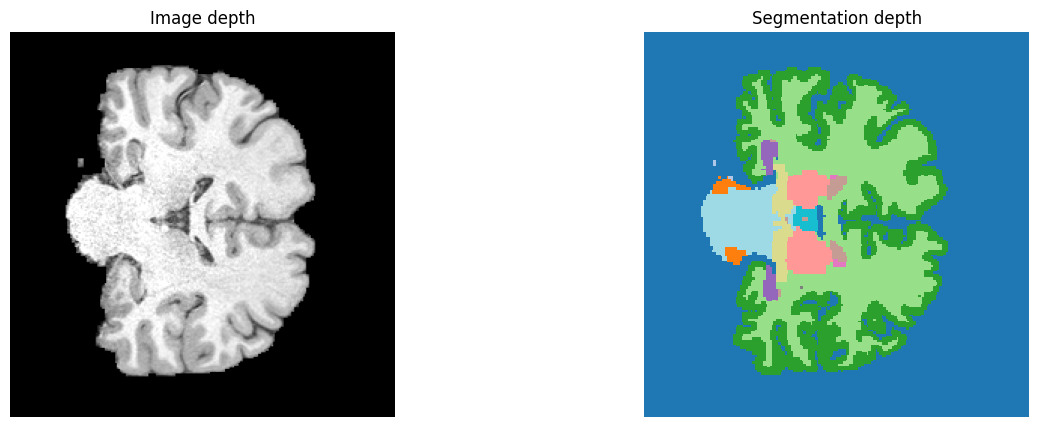

Image shape: torch.Size([1, 1, 256, 256])
Segmentation shape: torch.Size([1, 15, 256, 256])


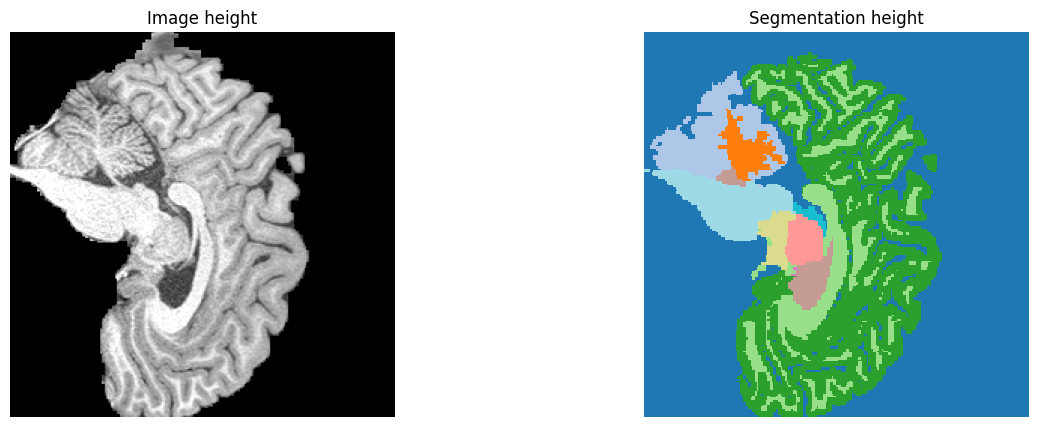

Image shape: torch.Size([1, 1, 256, 256])
Segmentation shape: torch.Size([1, 15, 256, 256])


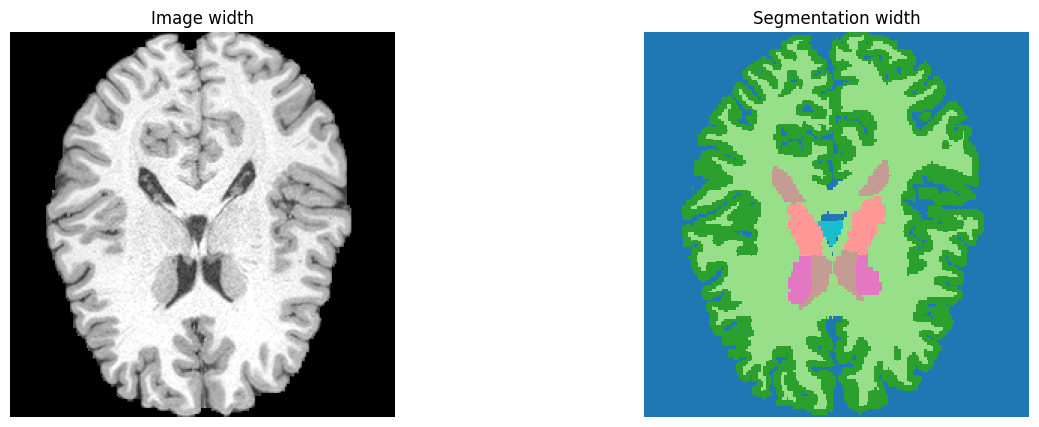

In [2]:
# Load Dataset and get example image
#:-------------------------------
dataset_name = 'hcp_t1'
split = 'train'
slice = 120

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '2D',
    orientation     = 'depth',   
    )


for orientation in ['depth', 'height', 'width']:
    dataset.orientation = orientation
    img, seg, *_ = dataset[slice]
    img = img
    seg = seg.float()

    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_torch_img(img)
    plt.title(f"Image {orientation}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_torch_seg(seg, vmin=0, vmax=dataset_cfg['n_classes'] -1)
    plt.title(f"Segmentation {orientation}")
    plt.axis('off')
    plt.show()

#### abide stanford

Image shape: torch.Size([1, 1, 256, 256])
Segmentation shape: torch.Size([1, 15, 256, 256])


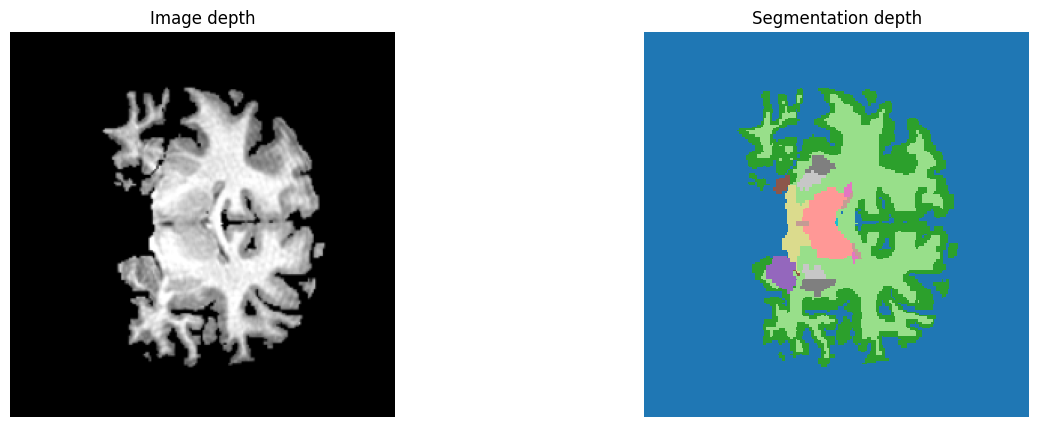

Image shape: torch.Size([1, 1, 132, 256])
Segmentation shape: torch.Size([1, 15, 132, 256])


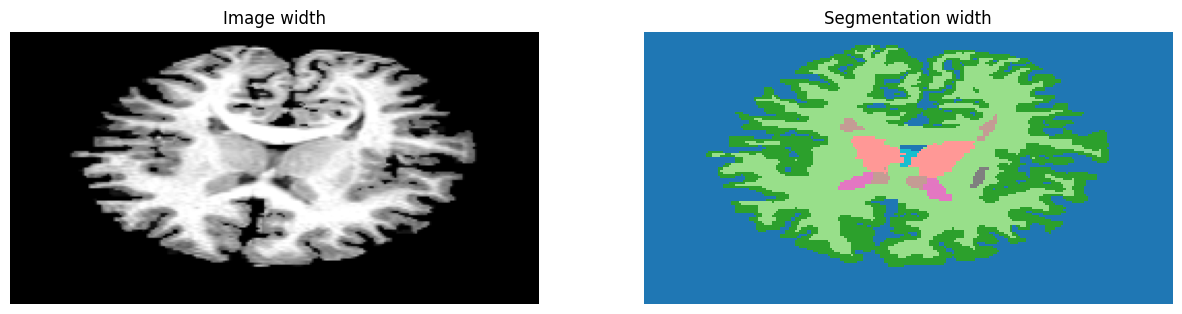

Image shape: torch.Size([1, 1, 132, 256])
Segmentation shape: torch.Size([1, 15, 132, 256])


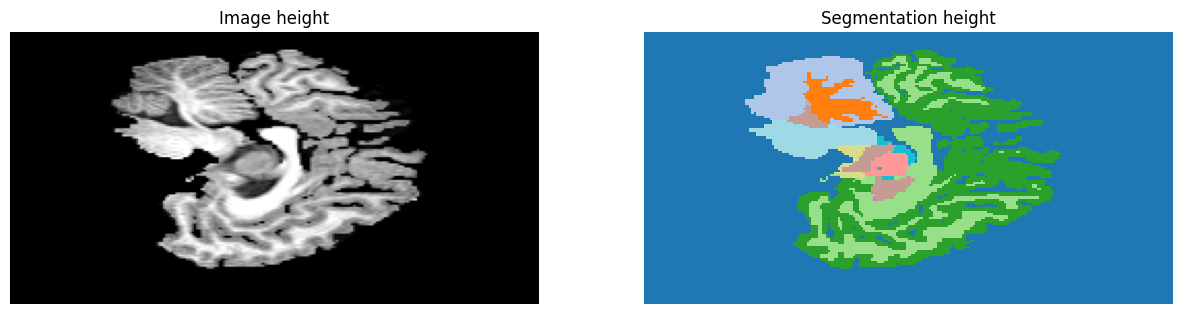

In [3]:
# Load Dataset and get example image
#:-------------------------------
dataset_name = 'abide_stanford'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '2D',
    orientation     = 'depth',   
    )


test_dict = {
    'depth': 64,
    'width': 128,
    'height': 128
}

for orientation, slice in test_dict.items():
    dataset.orientation = orientation
    img, seg, *_ = dataset[slice]
    img = img
    seg = seg.float()

    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_torch_img(img)
    plt.title(f"Image {orientation}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_torch_seg(seg, vmin=0, vmax=dataset_cfg['n_classes'] -1)
    plt.title(f"Segmentation {orientation}")
    plt.axis('off')
    plt.show()

Image shape: torch.Size([1, 1, 256, 256])
Segmentation shape: torch.Size([1, 2, 256, 256])


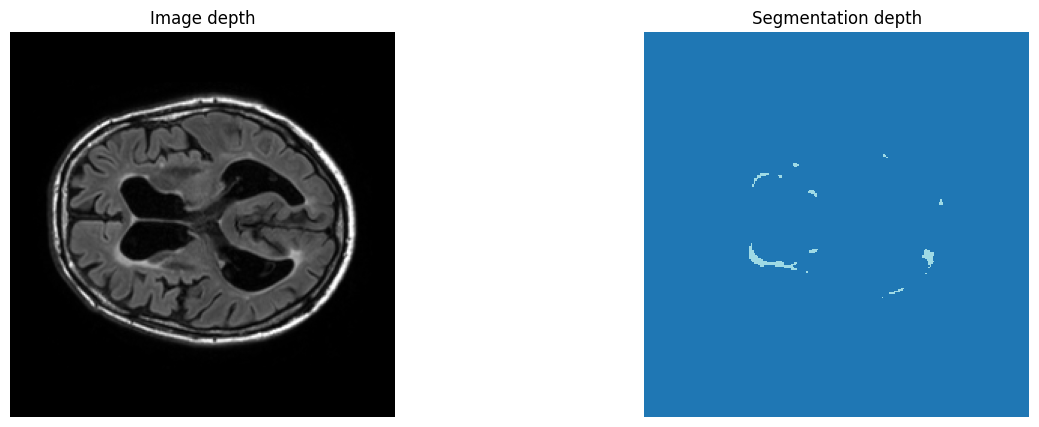

Image shape: torch.Size([1, 1, 48, 256])
Segmentation shape: torch.Size([1, 2, 48, 256])


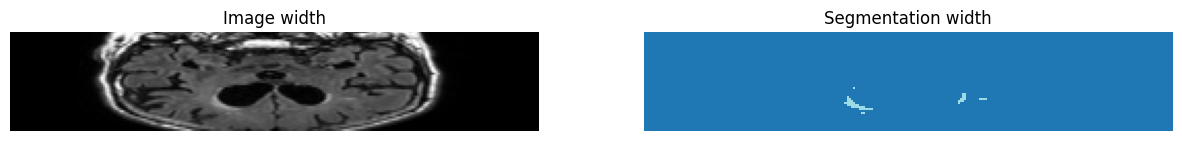

Image shape: torch.Size([1, 1, 48, 256])
Segmentation shape: torch.Size([1, 2, 48, 256])


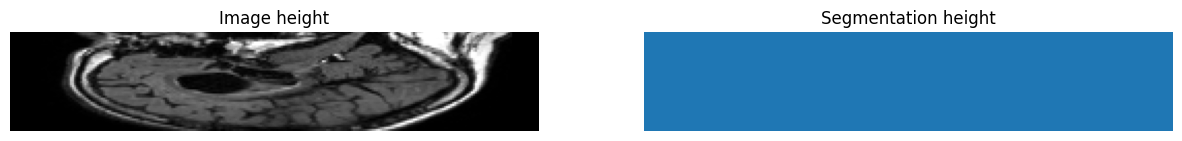

In [4]:
# Load Dataset and get example image
#:-------------------------------
dataset_name = 'umc'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '2D',
    orientation     = 'depth',   
    )


test_dict = {
    'depth': 24,
    'width': 128,
    'height': 128
}

for orientation, slice in test_dict.items():
    dataset.orientation = orientation
    img, seg, *_ = dataset[slice]
    img = img
    seg = seg.float()

    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_torch_img(img)
    plt.title(f"Image {orientation}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_torch_seg(seg, vmin=0, vmax=dataset_cfg['n_classes'] -1)
    plt.title(f"Segmentation {orientation}")
    plt.axis('off')
    plt.show()

### Try with original images 

Image shape: torch.Size([1, 1, 132, 256])
Segmentation shape: torch.Size([1, 2, 132, 256])


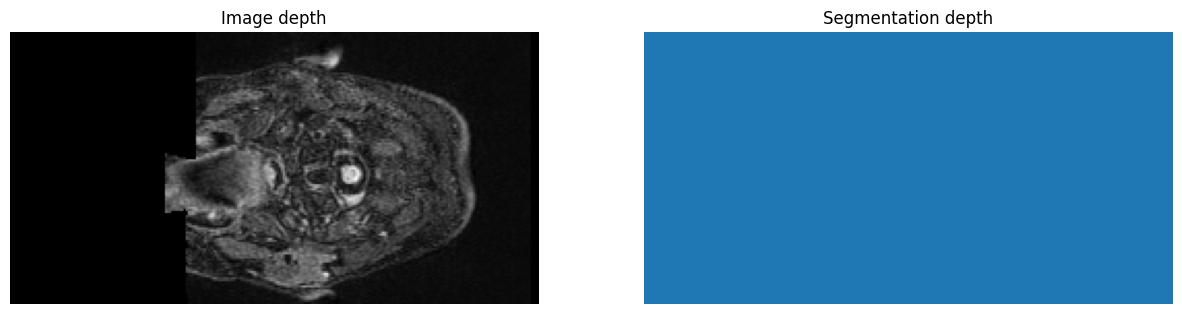

Image shape: torch.Size([1, 1, 83, 132])
Segmentation shape: torch.Size([1, 2, 83, 132])


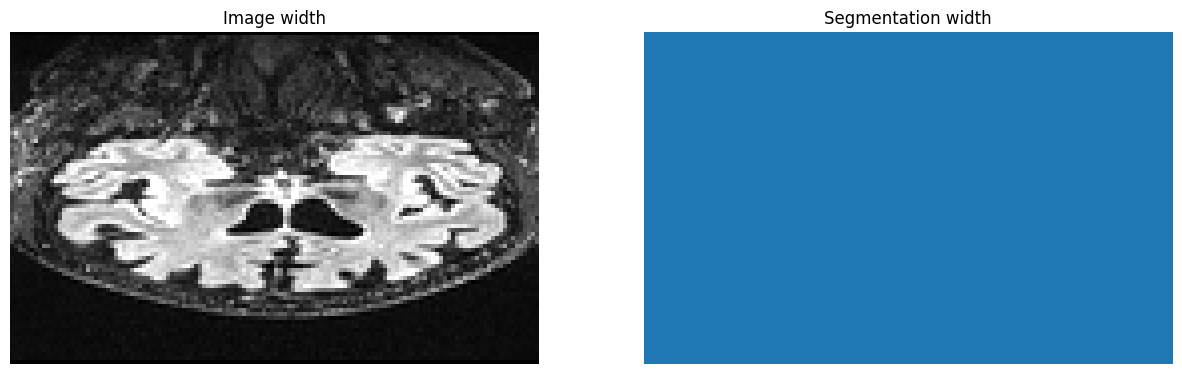

Image shape: torch.Size([1, 1, 83, 256])
Segmentation shape: torch.Size([1, 2, 83, 256])


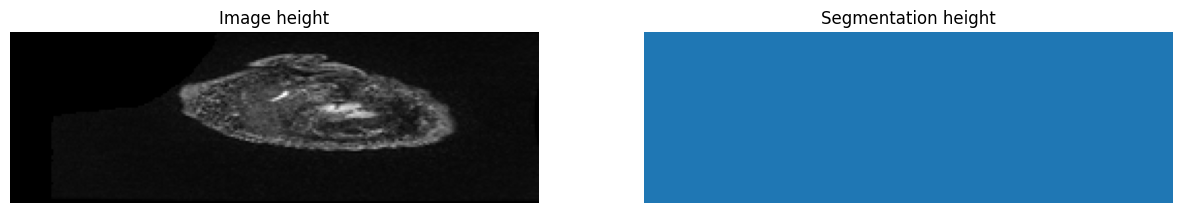

In [5]:
# Load Dataset and get example image
#:-------------------------------
dataset_name = 'vu'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '2D',
    orientation     = 'depth',   
    )


test_dict = {
    'depth': 24,
    'width': 128,
    'height': 128
}

for orientation, slice in test_dict.items():
    dataset.orientation = orientation
    img, seg, *_ = dataset.get_original_image(slice)
    img = img
    seg = seg.float()

    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_torch_img(img)
    plt.title(f"Image {orientation}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_torch_seg(seg, vmin=0, vmax=dataset_cfg['n_classes'] -1)
    plt.title(f"Segmentation {orientation}")
    plt.axis('off')
    plt.show()

### Try with resizings


Image shape: torch.Size([1, 1, 128, 128])
Segmentation shape: torch.Size([1, 2, 128, 128])


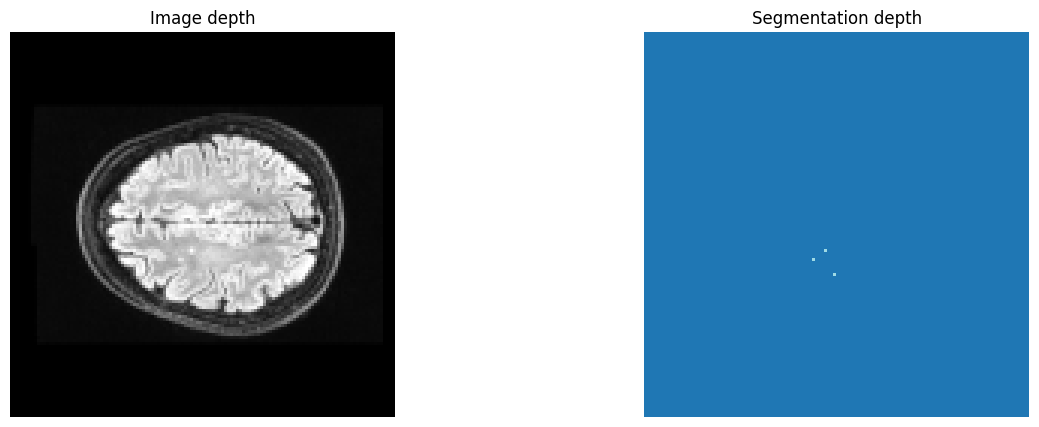

Image shape: torch.Size([1, 1, 12, 128])
Segmentation shape: torch.Size([1, 2, 12, 128])


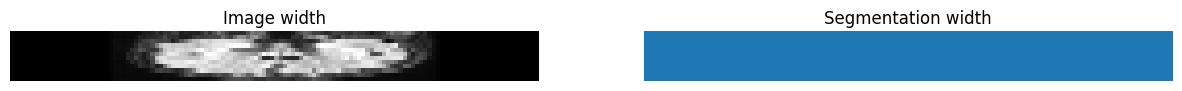

Image shape: torch.Size([1, 1, 12, 128])
Segmentation shape: torch.Size([1, 2, 12, 128])


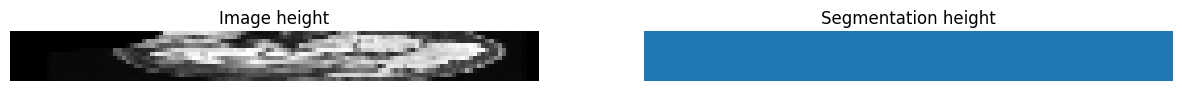

In [6]:
test_dict = {
    'depth': [0.5, 0.5, 1],
    'width': [0.5, 1, 0.25],
    'height': [1, 0.5, 0.25]
}

for orientation, rescale_factor in test_dict.items():
    dataset.orientation = orientation
    dataset.rescale_factor = rescale_factor
    img, seg, *_ = dataset[128]
    img = img
    seg = seg.float()

    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_torch_img(img)
    plt.title(f"Image {orientation}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_torch_seg(seg, vmin=0, vmax=dataset_cfg['n_classes'] -1)
    plt.title(f"Segmentation {orientation}")
    plt.axis('off')
    plt.show()

# Test loading volumes from different orientations

### preprocessed volumes

In [7]:
dataset_name = 'abide_stanford'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '3D',
    orientation     = 'height',   
    rescale_mode    = 'trilinear'
    )


In [8]:
img, label, *_ = dataset[1]

In [9]:
img.shape

torch.Size([1, 1, 256, 132, 256])

In [10]:
slice_ = 120

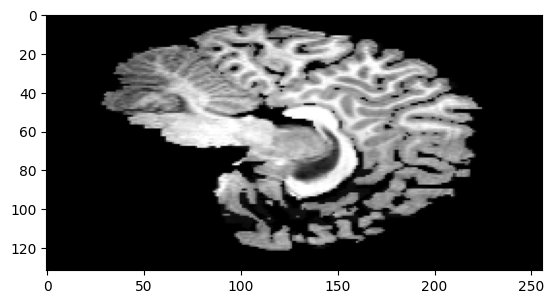

In [11]:
plot_torch_img(img[0, 0, slice_, ...])

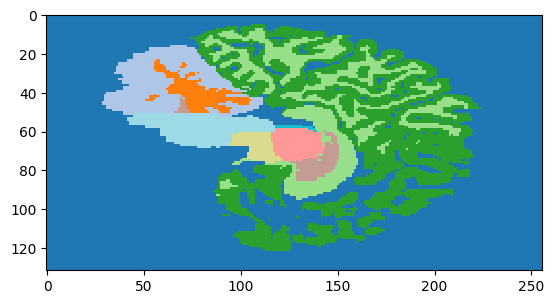

In [12]:
plot_torch_seg(label[0, :, slice_, ...][None, ...])

### Original volumes

In [13]:
dataset_name = 'hcp_t1'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 1],
    mode            = '3D',
    orientation     = 'depth',   
    rescale_mode    = 'trilinear'
    )


In [14]:
img, label, *_ = dataset.get_original_volume(1, output_format='NCDHW')

In [15]:
label.shape

torch.Size([1, 15, 256, 260, 260])

In [16]:
slice_ = 128

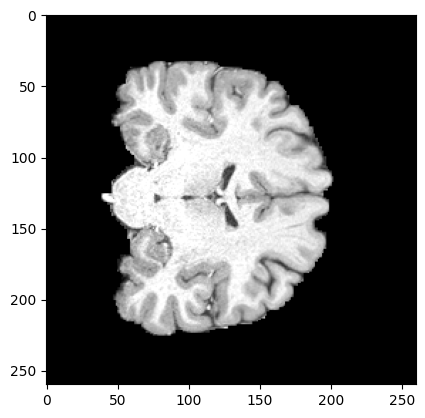

In [17]:
plot_torch_img(img[0, 0, slice_, ...])

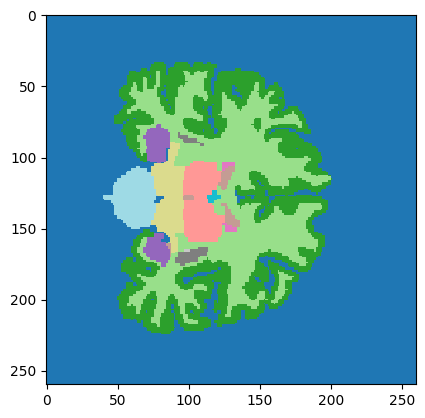

In [18]:
plot_torch_seg(label[0, :, slice_, ...][None, ...])

### Resample 3D volume

In [29]:
dataset_name = 'hcp_t1'
split = 'train'

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 0.5],
    rescale_mode    = "trilinear",
    rescale_only_inplane = False,
    mode            = '3D',
    orientation     = 'height',   
    )


In [30]:
img, label, *_ = dataset[1]

In [31]:
img.shape

torch.Size([1, 1, 256, 128, 256])

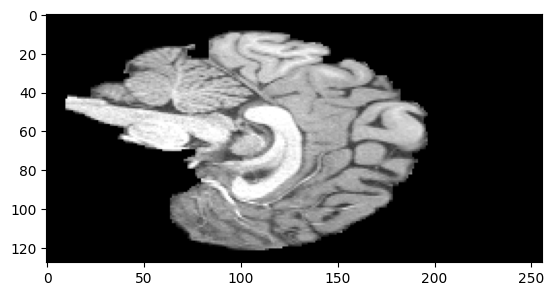

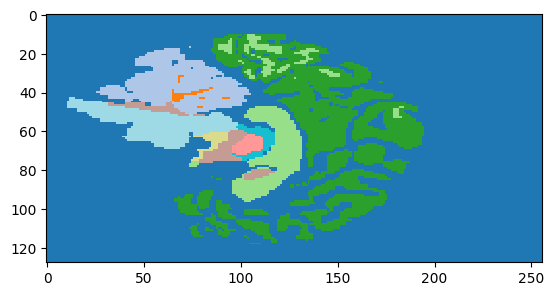

In [33]:
slice_ = 128
plot_torch_img(img[0, 0, slice_, ...])
plt.show()
plot_torch_seg(label[0, :, slice_, ...][None, ...])
plt.show()

## Test using a dataloader with num_workers=2

In [37]:
dataset_name = 'hcp_t1'
split = 'train'
slice = 120

dataset_cfg = load_config('../../config/datasets.yaml')
dataset_cfg = dataset_cfg[dataset_name]


(dataset,) = get_datasets(
    dataset_name    = dataset_name,
    splits          = [split],
    paths           = dataset_cfg['paths_processed'],
    paths_original  = dataset_cfg['paths_original'],
    resolution_proc = dataset_cfg['resolution_proc'],
    dim_proc        = dataset_cfg['dim'],
    n_classes       = dataset_cfg['n_classes'],
    load_original   = False,
    load_in_memory  = False,
    rescale_factor  = [1, 1, 0.25],
    rescale_mode    = "trilinear",
    mode            = '3D',
    orientation     = 'depth',   
    )

DataLoader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=8)

In [38]:
for img, seg, *_ in DataLoader:
    print(f"Image shape: {img.shape}")
    print(f"Segmentation shape: {seg.shape}")
    break

Image shape: torch.Size([4, 1, 1, 64, 256, 256])
Segmentation shape: torch.Size([4, 1, 15, 64, 256, 256])
